## Higgs Boson detection using accelerated machine learning

The Random Forest model has been used in this project to train datasets to classify Higgs boson signal from the background signal based on the dataset provided by my professors Dr. Carl Chalmers and Dr. Paul Fergus. Furthermore, a comparison with the XGBoost model has been made to assess how this model compares.

## The Data
The provided dataset contains almost 11 million simulated collison occurences. The data was generated using Monte Carlo simulations. A list of 28 features (21 low-level and seven high-level) and the target feature (1 for signal and 0 for background) is present in the given dataset. Some of features name are: **lepton pT, lepton eta, lepton phi, missing energy magnitude, missing energy phi** and many more which can be seen below in the code. 

The accelerator's particle detectors evaluate kinematic features in the first 21 characteristics (columns 2 to 22). The final seven traits, which are high-level features (columns 23-29) and are functions of the first 21 qualities, were devised by physicists to distinguish between the two groups.

Since, I am going to use GPU to perform this project I am going to use GPU supported libraries and framework such as RAPIDS that contains cuml, cudf. The reason I am using RAPIDS is that it will help me easily accelerate the workflows without going into the details of CUDA programming.

### Importing key Libraries

Lets import the libraries first that is going to be needed.

In [1]:
import pandas as pd 
import numpy as np  
# GPU-acclerated machine learning algorithms similar to Scikit-learn
import cuml 
# GPU dataframe library similar to pandas dataframe
import cudf 
import matplotlib.pyplot as plt 
%matplotlib inline

### Loading the data:
Lets load the dataset that is going to be used.

In [2]:
# Loading the data in cuDF dataframe for using GPU
df = cudf.read_csv('Partical.csv')

## 1. Preprocessing / Exploratory Data Analysis (EDA)
Lets analyse the data for preprocessing.

In [3]:
# To see the shape of the dataset
print('data',df.shape)

data (10999999, 29)


It can be seen that the dataset contains almost 11 million of rows and 29 columns.

In [4]:
# To see top 5 values of the dataset
df.head()

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [5]:
# To check some important values such as min, max, mean etc using describe function
df.describe()

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
count,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,...,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
mean,5.299200e-01,9.914660e-01,-8.000000e-06,-1.300000e-05,9.985360e-01,2.600000e-05,9.909150e-01,-2.000000e-05,8.000000e-06,9.999690e-01,...,-6.000000e-06,1.700000e-05,1.000000e+00,1.034290e+00,1.024805e+00,1.050554e+00,1.009742e+00,9.729600e-01,1.033036e+00,9.598120e-01
std,4.991040e-01,5.653780e-01,1.008827e+00,1.006346e+00,6.000180e-01,1.006326e+00,4.749750e-01,1.009303e+00,1.005901e+00,1.027808e+00,...,1.007694e+00,1.006366e+00,1.400209e+00,6.746350e-01,3.808070e-01,1.645760e-01,3.974450e-01,5.254060e-01,3.652560e-01,3.133380e-01
min,0.000000e+00,2.746970e-01,-2.434976e+00,-1.742508e+00,2.370000e-04,-1.743944e+00,1.375020e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,...,-2.497265e+00,-1.742691e+00,0.000000e+00,7.507000e-02,1.986760e-01,8.304900e-02,1.320060e-01,4.786200e-02,2.951120e-01,3.307210e-01
25%,0.000000e+00,5.907530e-01,-7.383220e-01,-8.719310e-01,5.768160e-01,-8.712080e-01,6.789930e-01,-6.872450e-01,-8.680960e-01,0.000000e+00,...,-7.141900e-01,-8.714790e-01,0.000000e+00,7.906100e-01,8.462270e-01,9.857520e-01,7.675730e-01,6.738170e-01,8.193960e-01,7.703900e-01
50%,1.000000e+00,8.533710e-01,-5.400000e-05,-2.410000e-04,8.916280e-01,2.130000e-04,8.948190e-01,-2.500000e-05,5.800000e-05,1.086538e+00,...,3.720000e-04,-2.640000e-04,0.000000e+00,8.949300e-01,9.506850e-01,9.897800e-01,9.165110e-01,8.733800e-01,9.473450e-01,8.719700e-01
75%,1.000000e+00,1.236226e+00,7.382140e-01,8.709940e-01,1.293056e+00,8.714710e-01,1.170740e+00,6.871940e-01,8.683130e-01,2.173076e+00,...,7.141020e-01,8.716050e-01,3.101961e+00,1.024730e+00,1.083493e+00,1.020528e+00,1.142226e+00,1.138439e+00,1.140458e+00,1.059248e+00
max,1.000000e+00,1.209891e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,9.940391e+00,2.969674e+00,1.741454e+00,2.173076e+00,...,2.498009e+00,1.743372e+00,3.101961e+00,4.019237e+01,2.037278e+01,7.992739e+00,1.426244e+01,1.776285e+01,1.149652e+01,8.374498e+00


Lets start the cleaning process for unifying complex data sets for easy access and analysis. Since, columns heading is not readable or understandable let us change it to its original variable name which I have taken from https://archive.ics.uci.edu/ml/datasets/HIGGS.

In [6]:
# To rename the columns heading where "inplace = True" assigns columns without a copy
df.rename(columns={"1.000000000000000000e+00":"class",
                  "8.692932128906250000e-01":"lepton pT",
                  "-6.350818276405334473e-01":"lepton eta",
                  "2.256902605295181274e-01":"lepton phi", 
                  "3.274700641632080078e-01":"missing energy magnitude",
                  "-6.899932026863098145e-01":"missing energy phi", 
                  "7.542022466659545898e-01":"jet 1 pt",
                  "-2.485731393098831177e-01":"jet 1 eta", 
                  "-1.092063903808593750e+00":"jet 1 phi",
                  "0.000000000000000000e+00":"jet 1 b-tag", 
                  "1.374992132186889648e+00":"jet 2 pt",
                  "-6.536741852760314941e-01":"jet 2 eta", 
                  "9.303491115570068359e-01":"jet 2 phi",
                  "1.107436060905456543e+00":"jet 2 b-tag", 
                  "1.138904333114624023e+00":"jet 3 pt",
                  "-1.578198313713073730e+00":"jet 3 eta",
                  "-1.046985387802124023e+00":"jet 3 phi",
                  "0.000000000000000000e+00.1":"jet 3 b-tag",
                  "6.579295396804809570e-01":"jet 4 pt",
                  "-1.045456994324922562e-02":"jet 4 eta",
                  "-4.576716944575309753e-02":"jet 4 phi",
                  "3.101961374282836914e+00":"jet 4 b-tag",
                  "1.353760004043579102e+00":"m_jj",
                  "9.795631170272827148e-01":"m_jjj",
                  "9.780761599540710449e-01":"m_lv",
                  "9.200048446655273438e-01":"m_jlv",
                  "7.216574549674987793e-01":"m_bb",
                  "9.887509346008300781e-01":"m_wbb",
                  "8.766783475875854492e-01":"m_wwbb"}, inplace=True)

In [7]:
# Lets check the updated names
df.head()

,class,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


It is more readable and understandable now after renaming the column headers or features name.

In [8]:
# To print all the columns that is present in the dataset for checking any mistake
pd.set_option('display.max_columns', 29) 
df.head()

,class,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,-0.213642,1.271015,2.214872,0.499994,-1.261432,0.732156,0.000000,0.398701,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,1.540659,-0.819690,2.214872,0.993490,0.356080,-0.208778,2.548224,1.256955,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,-0.676016,0.736159,2.214872,1.298720,-1.430738,-0.364658,0.000000,0.745313,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,1.020974,0.971407,2.214872,0.596761,-0.350273,0.631194,0.000000,0.479999,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,0.755421,0.643110,1.426367,0.000000,0.921661,-1.190432,-1.615589,0.000000,0.651114,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [9]:
# To check the datatype of each variable and other informations 
df.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 29 columns):
 #   Column                    Dtype
---  ------                    -----
 0   class                     float64
 1   lepton pT                 float64
 2   lepton eta                float64
 3   lepton phi                float64
 4   missing energy magnitude  float64
 5   missing energy phi        float64
 6   jet 1 pt                  float64
 7   jet 1 eta                 float64
 8   jet 1 phi                 float64
 9   jet 1 b-tag               float64
 10  jet 2 pt                  float64
 11  jet 2 eta                 float64
 12  jet 2 phi                 float64
 13  jet 2 b-tag               float64
 14  jet 3 pt                  float64
 15  jet 3 eta                 float64
 16  jet 3 phi                 float64
 17  jet 3 b-tag               float64
 18  jet 4 pt                  float64
 19  jet 4 eta                 float64
 20  jet 4 phi               

Since, all variables/features are of same datatype, We don't have to worry about that. However, GPU **doesn't support float64** datatype therefore I am going to change datatype of all variables into **float32** datatype before training the model below.

In [10]:
# To check updated data description 
df.describe()

,class,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
mean,5.299200e-01,9.914660e-01,-8.000000e-06,-1.300000e-05,9.985360e-01,2.600000e-05,9.909150e-01,-2.000000e-05,8.000000e-06,9.999690e-01,9.927290e-01,-1.000000e-05,-2.100000e-05,1.000008e+00,9.922590e-01,1.500000e-05,4.000000e-06,1.000012e+00,9.861090e-01,-6.000000e-06,1.700000e-05,1.000000e+00,1.034290e+00,1.024805e+00,1.050554e+00,1.009742e+00,9.729600e-01,1.033036e+00,9.598120e-01
std,4.991040e-01,5.653780e-01,1.008827e+00,1.006346e+00,6.000180e-01,1.006326e+00,4.749750e-01,1.009303e+00,1.005901e+00,1.027808e+00,4.999940e-01,1.009331e+00,1.006154e+00,1.049398e+00,4.876620e-01,1.008747e+00,1.006305e+00,1.193676e+00,5.057780e-01,1.007694e+00,1.006366e+00,1.400209e+00,6.746350e-01,3.808070e-01,1.645760e-01,3.974450e-01,5.254060e-01,3.652560e-01,3.133380e-01
min,0.000000e+00,2.746970e-01,-2.434976e+00,-1.742508e+00,2.370000e-04,-1.743944e+00,1.375020e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,1.889810e-01,-2.913090e+00,-1.742372e+00,0.000000e+00,2.636080e-01,-2.729663e+00,-1.742069e+00,0.000000e+00,3.653540e-01,-2.497265e+00,-1.742691e+00,0.000000e+00,7.507000e-02,1.986760e-01,8.304900e-02,1.320060e-01,4.786200e-02,2.951120e-01,3.307210e-01
25%,0.000000e+00,5.907530e-01,-7.383220e-01,-8.719310e-01,5.768160e-01,-8.712080e-01,6.789930e-01,-6.872450e-01,-8.680960e-01,0.000000e+00,6.564610e-01,-6.944720e-01,-8.701790e-01,0.000000e+00,6.508530e-01,-6.998080e-01,-8.711340e-01,0.000000e+00,6.177670e-01,-7.141900e-01,-8.714790e-01,0.000000e+00,7.906100e-01,8.462270e-01,9.857520e-01,7.675730e-01,6.738170e-01,8.193960e-01,7.703900e-01
50%,1.000000e+00,8.533710e-01,-5.400000e-05,-2.410000e-04,8.916280e-01,2.130000e-04,8.948190e-01,-2.500000e-05,5.800000e-05,1.086538e+00,8.901380e-01,6.000000e-05,3.510000e-04,0.000000e+00,8.972490e-01,1.730000e-04,-7.520000e-04,0.000000e+00,8.682330e-01,3.720000e-04,-2.640000e-04,0.000000e+00,8.949300e-01,9.506850e-01,9.897800e-01,9.165110e-01,8.733800e-01,9.473450e-01,8.719700e-01
75%,1.000000e+00,1.236226e+00,7.382140e-01,8.709940e-01,1.293056e+00,8.714710e-01,1.170740e+00,6.871940e-01,8.683130e-01,2.173076e+00,1.201875e+00,6.945920e-01,8.698730e-01,2.214872e+00,1.221798e+00,7.001540e-01,8.713950e-01,2.548224e+00,1.220930e+00,7.141020e-01,8.716050e-01,3.101961e+00,1.024730e+00,1.083493e+00,1.020528e+00,1.142226e+00,1.138439e+00,1.140458e+00,1.059248e+00
max,1.000000e+00,1.209891e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,9.940391e+00,2.969674e+00,1.741454e+00,2.173076e+00,1.164708e+01,2.913210e+00,1.743175e+00,2.214872e+00,1.470899e+01,2.730009e+00,1.742884e+00,2.548224e+00,1.288257e+01,2.498009e+00,1.743372e+00,3.101961e+00,4.019237e+01,2.037278e+01,7.992739e+00,1.426244e+01,1.776285e+01,1.149652e+01,8.374498e+00


It can be seen that the values are in scientific format which is not readable so for this I will be using pandas dataframe to convert this into readable format and then we will be able to analyse the data. This has been done below.

Lets count the number of 1 (produces Higgs boson) and 0 (background noise) to see 
whether there is any data disbalance or not.

In [11]:
# To check the number of 1 and 0 in class column
print(df['class'].value_counts())

# There is slightly imbalalanced of the data which is fine
# Hence, I decided not to do the oversampling or undersampling of the data

1.0    5829122
0.0    5170877
Name: class, dtype: int32


In [12]:
# To check for the null values in any features
df.isnull().sum()

class                       0
lepton pT                   0
lepton eta                  0
lepton phi                  0
missing energy magnitude    0
missing energy phi          0
jet 1 pt                    0
jet 1 eta                   0
jet 1 phi                   0
jet 1 b-tag                 0
jet 2 pt                    0
jet 2 eta                   0
jet 2 phi                   0
jet 2 b-tag                 0
jet 3 pt                    0
jet 3 eta                   0
jet 3 phi                   0
jet 3 b-tag                 0
jet 4 pt                    0
jet 4 eta                   0
jet 4 phi                   0
jet 4 b-tag                 0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: uint64

It can be seen that there is no null values in the given dataset which means deletion or replacing with mean/median/mode will not be required.

Lets use matplotlib to visualise the data. However, because cuDF does not support matplotlib and a few operations that pandas dataframe can execute, I will utilise pandas dataframe below.

Note: All the functions or operations that has been performed on pandas dataframe below cannot be done in cuda dataframe except which has been done above like df.shape, df.describe() and so on.

In [13]:
# Lets convert cudf to pandas df
pd_df = df.to_pandas()

In [14]:
# Lets check the converted pandas data
pd_df.head()

,class,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,-0.213642,1.271015,2.214872,0.499994,-1.261432,0.732156,0.000000,0.398701,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,1.540659,-0.819690,2.214872,0.993490,0.356080,-0.208778,2.548224,1.256955,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,-0.676016,0.736159,2.214872,1.298720,-1.430738,-0.364658,0.000000,0.745313,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,1.020974,0.971407,2.214872,0.596761,-0.350273,0.631194,0.000000,0.479999,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,0.755421,0.643110,1.426367,0.000000,0.921661,-1.190432,-1.615589,0.000000,0.651114,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [16]:
# Lets check the number of unique values for each variable/features
pd_df.nunique(axis=0)

class                             2
lepton pT                     27983
lepton eta                     5001
lepton phi                     6284
missing energy magnitude    1249475
missing energy phi          2218464
jet 1 pt                      45559
jet 1 eta                      5999
jet 1 phi                      6284
jet 1 b-tag                       3
jet 2 pt                      37793
jet 2 eta                      5999
jet 2 phi                      6284
jet 2 b-tag                       3
jet 3 pt                      27073
jet 3 eta                      5999
jet 3 phi                      6284
jet 3 b-tag                       3
jet 4 pt                      19881
jet 4 eta                      5999
jet 4 phi                      6284
jet 4 b-tag                       3
m_jj                        1068674
m_jjj                        495814
m_lv                         344267
m_jlv                        524126
m_bb                        1127135
m_wbb                       

It can be seen that there are many unique values in some features and less uniqueness in few features. Later on we gonna deal with this by extracting features in the cuda dataframe rather than in pandas dataframe.

In [17]:
# To check if there is any correlation between features so that highly correlated 
# features can be removed
corr = pd_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,class,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
class,1.000000,-0.048599,-0.000134,0.000643,-0.099999,-0.000539,0.056908,-0.000003,0.000431,-0.009731,0.021891,-0.000183,-0.000734,-0.049985,0.014865,-0.000208,-0.000268,-0.023926,0.037140,-0.000344,0.000432,0.015057,0.012852,0.025545,0.010999,-0.030911,-0.152094,-0.065590,-0.123266
lepton pT,-0.048599,1.000000,-0.000153,-0.000175,-0.139528,0.000232,0.165798,-0.000135,-0.000335,-0.006265,0.004612,0.000031,0.000071,-0.005632,-0.011190,0.000571,0.000149,0.005832,-0.019608,0.000090,-0.000047,0.000139,0.026513,0.017842,0.272327,0.132228,0.007636,0.095841,0.141168
lepton eta,-0.000134,-0.000153,1.000000,0.000418,-0.000438,0.000161,-0.000396,0.264797,-0.000187,0.000275,0.000123,0.264615,-0.000418,-0.000263,0.000451,0.226182,-0.000340,0.000095,0.000150,0.177698,0.000301,-0.000146,0.000306,-0.000133,-0.000272,0.000061,0.000145,-0.000011,0.000072
lepton phi,0.000643,-0.000175,0.000418,1.000000,-0.000012,-0.044518,-0.000135,0.000793,-0.167880,-0.000178,-0.000241,0.000419,-0.093681,0.000027,-0.000072,0.000674,-0.082511,-0.000160,-0.000109,0.000983,-0.065012,-0.000227,0.000358,0.000176,-0.000788,0.000409,-0.000249,0.000207,0.000321
missing energy magnitude,-0.099999,-0.139528,-0.000438,-0.000012,1.000000,-0.000232,0.199157,-0.000119,-0.000036,-0.030368,0.039498,0.000177,0.000013,-0.005196,0.019677,-0.000530,0.000093,0.010641,0.004578,-0.000017,-0.000165,0.009673,0.034129,0.032766,0.171896,0.280523,0.025929,0.213948,0.298656
missing energy phi,-0.000539,0.000232,0.000161,-0.044518,-0.000232,1.000000,0.000118,-0.000642,-0.154905,0.000001,0.000399,-0.000119,-0.064373,-0.000313,0.000067,-0.000435,-0.052710,0.000337,0.000025,-0.000475,-0.038633,0.000204,-0.000024,0.000355,0.000583,0.000060,0.000662,0.000427,0.000329
jet 1 pt,0.056908,0.165798,-0.000396,-0.000135,0.199157,0.000118,1.000000,-0.000329,-0.000110,-0.015637,0.487611,0.000027,-0.000063,-0.032107,0.267882,-0.000210,0.000206,-0.025106,0.164582,0.000085,-0.000173,-0.005552,0.186940,0.261443,0.018275,0.278144,0.335090,0.480738,0.450244
jet 1 eta,-0.000003,-0.000135,0.264797,0.000793,-0.000119,-0.000642,-0.000329,1.000000,0.000106,-0.000009,-0.000416,0.246482,0.000434,-0.000105,0.000331,0.230847,-0.000059,0.000356,0.000186,0.191889,-0.000280,-0.000070,0.000508,0.000547,0.000585,0.000233,0.000027,0.000528,0.000329
jet 1 phi,0.000431,-0.000335,-0.000187,-0.167880,-0.000036,-0.154905,-0.000110,0.000106,1.000000,0.000057,-0.000312,-0.000135,-0.198034,0.000613,0.000065,-0.000187,-0.133385,-0.000606,0.000179,-0.000052,-0.101777,0.000275,-0.000067,-0.000127,-0.000199,-0.000553,-0.000424,-0.000167,-0.000164
jet 1 b-tag,-0.009731,-0.006265,0.000275,-0.000178,-0.030368,0.000001,-0.015637,-0.000009,0.000057,1.000000,-0.136351,0.000220,-0.000757,-0.259127,-0.148107,-0.000132,0.000277,-0.256531,-0.147732,-0.000170,-0.000275,-0.234233,-0.115780,-0.070605,0.000428,0.132221,0.270451,0.111227,0.003050


From above matrix, it can be seen that except for some feature in the last columns, there is little to none correlation between attributes.

Since, those two were high level features I decided to keep it but later on I'll be training the model by modifying these features.

<AxesSubplot:xlabel='m_jlv', ylabel='m_wwbb'>

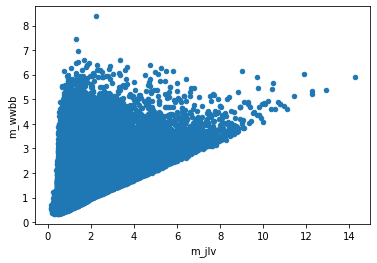

In [18]:
# Lets use scatterplot to see the relation between two variables/features
pd_df.plot.scatter(x='m_jlv',y='m_wwbb')

# It shows that there is a positive correlation between above two variables/features

<AxesSubplot:>

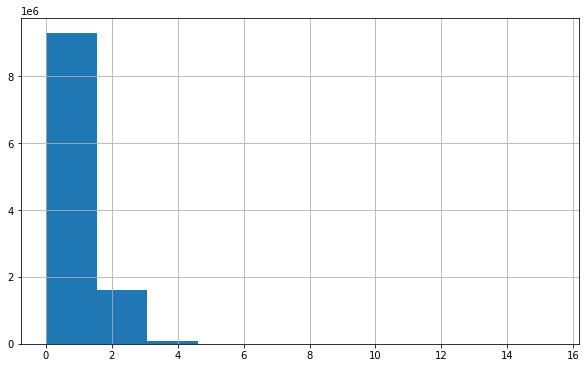

In [20]:
# To explore the data of single variable/feature
plt.figure(figsize=(10,6))
pd_df['missing energy magnitude'].hist()

After running scatter plot and histogram for various features, I have decided to train the model with different parameters for which the comparison can be seen in the Summary jupyter notebook.

Since, above the values in describe() method was not understandable because of the scientific notation. Lets format each row to the regular format by suppressing scientific notation to get more information. 

In [21]:
# Lets format each row to the regular format by suppressing scientific notation
pd_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,class,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000,10999999.000000
mean,0.529920,0.991466,-0.000008,-0.000013,0.998536,0.000026,0.990915,-0.000020,0.000008,0.999969,0.992729,-0.000010,-0.000021,1.000008,0.992259,0.000015,0.000004,1.000012,0.986109,-0.000006,0.000017,1.000000,1.034290,1.024805,1.050554,1.009742,0.972960,1.033036,0.959812
std,0.499104,0.565378,1.008827,1.006346,0.600018,1.006326,0.474975,1.009303,1.005901,1.027808,0.499994,1.009331,1.006154,1.049398,0.487662,1.008747,1.006305,1.193676,0.505778,1.007694,1.006366,1.400209,0.674635,0.380807,0.164576,0.397445,0.525406,0.365256,0.313338
min,0.000000,0.274697,-2.434976,-1.742508,0.000237,-1.743944,0.137502,-2.969725,-1.741237,0.000000,0.188981,-2.913090,-1.742372,0.000000,0.263608,-2.729663,-1.742069,0.000000,0.365354,-2.497265,-1.742691,0.000000,0.075070,0.198676,0.083049,0.132006,0.047862,0.295112,0.330721
25%,0.000000,0.590753,-0.738322,-0.871931,0.576816,-0.871208,0.678993,-0.687245,-0.868096,0.000000,0.656461,-0.694472,-0.870179,0.000000,0.650853,-0.699808,-0.871134,0.000000,0.617767,-0.714190,-0.871479,0.000000,0.790610,0.846227,0.985752,0.767573,0.673817,0.819396,0.770390
50%,1.000000,0.853371,-0.000054,-0.000241,0.891628,0.000213,0.894819,-0.000025,0.000058,1.086538,0.890138,0.000060,0.000351,0.000000,0.897249,0.000173,-0.000752,0.000000,0.868233,0.000372,-0.000264,0.000000,0.894930,0.950685,0.989780,0.916511,0.873380,0.947345,0.871970
75%,1.000000,1.236226,0.738214,0.870994,1.293056,0.871471,1.170740,0.687194,0.868313,2.173076,1.201875,0.694592,0.869873,2.214872,1.221798,0.700154,0.871395,2.548224,1.220930,0.714102,0.871605,3.101961,1.024730,1.083493,1.020528,1.142226,1.138439,1.140458,1.059248
max,1.000000,12.098914,2.434868,1.743236,15.396821,1.743257,9.940391,2.969674,1.741454,2.173076,11.647081,2.913210,1.743175,2.214872,14.708989,2.730009,1.742884,2.548224,12.882567,2.498009,1.743372,3.101961,40.192368,20.372782,7.992739,14.262439,17.762852,11.496522,8.374498


Now, it can be clearly understandable the description of the data. Since, 75% of the value lies within 1.2 in all the features. Also, from the histogram plot I noticed that more than 90-95% of data lies below value 3. 

Hence, lets remove the outliers where the features values are above 3 because outliers may overfit the accuracy which we don't want.

Since the dataset paper states clearly that high-level features have greater discrimination power than low-level features. As a result, I'm going to remove 21 low-level features from the dataset and classify using only the high-level features.

But I am going to try with other features too such as:
1. By removing highly correlated features and all jet_3 and jet_4 (8 columns).
2. By using all features and data in the dataset.
3. By removing some data according to the EDA process done above.

and many other combinations which will be discussed in Summary jupyter notebook. 

Now, I'm doing all the changes mentioned on the cuDF dataframe because I wan't to use GPU for accelerated computing and panda dataframe was used just for analysing the data which was not supported in cudF dataframe.

In [22]:
# With 21 features and features having values less than 3

# Selected 21 features because while doing preprocessing I noticed that values of jet 1,
# jet 2, jet 3 and jet 4 were similar so decided to remove all jet 3 and jet 4 features

# Lets remove the unwanted features 
df = df.drop(labels=['jet 3 pt','jet 3 eta','jet 3 phi','jet 3 b-tag',
                     'jet 4 pt','jet 4 eta','jet 4 phi','jet 4 b-tag'], axis=1)

In [23]:
# To remove the outliers from the dataset
df = df[df['m_jj']<3]
df = df[df['m_jjj']<3]
df = df[df['m_lv']<3]
df = df[df['m_jlv']<3]
df = df[df['m_bb']<3]
df = df[df['m_wbb']<3]
df = df[df['m_wwbb']<3]
df = df[df['lepton pT']<3]
df = df[df['missing energy magnitude']<3]
df = df[df['jet 1 pt']<3]
df = df[df['jet 2 pt']<3]

In [24]:
# Updated shape
df.shape

(10410784, 21)

In [25]:
# Lets check the info again
df.info()

<class 'cudf.core.dataframe.DataFrame'>
Int64Index: 10410784 entries, 0 to 10999998
Data columns (total 21 columns):
 #   Column                    Dtype
---  ------                    -----
 0   class                     float64
 1   lepton pT                 float64
 2   lepton eta                float64
 3   lepton phi                float64
 4   missing energy magnitude  float64
 5   missing energy phi        float64
 6   jet 1 pt                  float64
 7   jet 1 eta                 float64
 8   jet 1 phi                 float64
 9   jet 1 b-tag               float64
 10  jet 2 pt                  float64
 11  jet 2 eta                 float64
 12  jet 2 phi                 float64
 13  jet 2 b-tag               float64
 14  m_jj                      float64
 15  m_jjj                     float64
 16  m_lv                      float64
 17  m_jlv                     float64
 18  m_bb                      float64
 19  m_wbb                     float64
 20  m_wwbb                  

Since, GPU does not support float64 datatype it needs to be converted into float32 datatype.

In [26]:
# To convert the float64 datatype to float32 datatype
df = df.astype(np.float32)

In [27]:
# Udpated datatype
df.info()

<class 'cudf.core.dataframe.DataFrame'>
Int64Index: 10410784 entries, 0 to 10999998
Data columns (total 21 columns):
 #   Column                    Dtype
---  ------                    -----
 0   class                     float32
 1   lepton pT                 float32
 2   lepton eta                float32
 3   lepton phi                float32
 4   missing energy magnitude  float32
 5   missing energy phi        float32
 6   jet 1 pt                  float32
 7   jet 1 eta                 float32
 8   jet 1 phi                 float32
 9   jet 1 b-tag               float32
 10  jet 2 pt                  float32
 11  jet 2 eta                 float32
 12  jet 2 phi                 float32
 13  jet 2 b-tag               float32
 14  m_jj                      float32
 15  m_jjj                     float32
 16  m_lv                      float32
 17  m_jlv                     float32
 18  m_bb                      float32
 19  m_wbb                     float32
 20  m_wwbb                  

## 2. Train/Test split
Lets split the dataset into training and testing data with a split of 90/10 percentage respectively.

Also, there aren't many variations between the dataset ranges after preprocessing, because of which, I'm not implementing feature value standardisation.

In [55]:
# Importing train test split using cuml
from cuml.model_selection import train_test_split

X = df.drop(['class'], axis=1) # features
y = df['class'].astype(np.int32) # labels ('int32' so that confusion matrix can be run)

# Split dataset into train and test set with 90/10 percentage
# Random state (it ensures that the splits you create are repeatable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [31]:
# To check dimensions
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)

X_train:  (9369706, 20)
X_test:  (1041078, 20)


In [29]:
# To import random forest classifier from cuML
from cuml import RandomForestClassifier as cuRF

In [30]:
# To implement random forest classifier with 150 trees
rf_clf = cuRF(n_estimators=150)

In [57]:
%%time
# To do model training
rf_clf.fit(X_train, y_train)

CPU times: user 2min 12s, sys: 376 ms, total: 2min 13s
Wall time: 39.5 s


RandomForestClassifier()

In [58]:
# To check the accuracy of the model
y_pred = rf_clf.predict(X_test)
cuml.metrics.accuracy_score(y_pred, y_test)

0.7304486036300659

## XGBoost Implementation
Lets implement the given dataset with the help of XGBoost algorithm so that the performance comparison can be done. 

In [34]:
# import xgboost
import xgboost as xgb; print('XGBoost Version:', xgb.__version__)

XGBoost Version: 1.5.0


I am using the same train/test split, random state for the XGBoost model that is used in Random Forest so that fair comparison can be done.

In [39]:
# To check dimensions again
print('X_train: ', X_train.shape, 'y_train: ', y_train.shape )
print('X_test: ', X_test.shape, 'y_test: ', y_test.shape)

X_train:  (9369706, 20) y_train:  (9369706,)
X_test:  (1041078, 20) y_test:  (1041078,)


XGBoost does not work with cuDF data because of which we need to convert this data to a DMatrix object that XGBoost can work with. DMatrix is invoked by supplying the feature matrix as the first argument, followed by the label vector as the label= keyword argument.

In [40]:
%%time
# To convert cuDF dataframe to DMatrix  
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

CPU times: user 112 ms, sys: 55.5 ms, total: 168 ms
Wall time: 219 ms


In [43]:
# settings
classification = True  # change this to false to use regression

# instantiate params
params = {}

# general params
general_params = {'silent': 1}
params.update(general_params)

# booster params
n_gpus = 1  # change this to -1 to use all GPUs available or 0 to use the CPU
booster_params = {}

if n_gpus != 0:
    booster_params['tree_method'] = 'gpu_hist' # 'hist' for using cpu
    booster_params['n_gpus'] = n_gpus   
params.update(booster_params)

# learning task params
learning_task_params = {}
if classification:
    learning_task_params['eval_metric'] = 'auc'
    learning_task_params['objective'] = 'binary:logistic'
else:
    learning_task_params['eval_metric'] = 'rmse'
    learning_task_params['objective'] = 'reg:squarederror'
params.update(learning_task_params)
print(params)

{'silent': 1, 'tree_method': 'gpu_hist', 'n_gpus': 1, 'eval_metric': 'auc', 'objective': 'binary:logistic'}


I provided the parameter values for running and evaluating the model above. I'm using GPU to train the model, where the tree method is 'gpu hist'. I'm evaluating this classification challenge using AUC (Area Under Curve), which measures a classifier's ability to distinguish between classes.

In [44]:
# model training settings
evaluation_list = [(d_test, 'test'), (d_train, 'train')]
# number of boosting iterations
num_round = 400

In [45]:
%%time
# To train and evaluate the model
bst_model = xgb.train(params, d_train, num_round, evaluation_list)

[19:08:23] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:576: 
Parameters: { "n_gpus", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	test-auc:0.74189	train-auc:0.74225
[1]	test-auc:0.75270	train-auc:0.75319
[2]	test-auc:0.76150	train-auc:0.76180
[3]	test-auc:0.76720	train-auc:0.76748
[4]	test-auc:0.77113	train-auc:0.77138
[5]	test-auc:0.77533	train-auc:0.77572
[6]	test-auc:0.77941	train-auc:0.77981
[7]	test-auc:0.78286	train-auc:0.78320
[8]	test-auc:0.78541	train-auc:0.78577
[9]	test-auc:0.78729	train-auc:0.78769
[10]	test-auc:0.78922	train-auc:0.78957
[11]	test-auc:0.79073	train-auc:0.79109
[12]	test-auc:0.79204	train-auc:0.79244
[13]	test-auc:0.79330	train-auc:0.79370
[14]	test-auc:0.79408	trai

## 3. Evaluation
Lets do the evaluation of the Random Forest model that have been performed on GPU to measure the effectiveness of the model.

While doing evaluation I came to know that, cuml metrics doesn't support classification_report so I was not able to print it and it also doesn't support 'float32' datatype because of which I decided to convert predictions into int datatype below.  

In [64]:
# To import confusion matrix
from cuml.metrics import confusion_matrix

#converting y_pred to int32 from float32 datatype to run confusion matrix in GPU
y_pred_int = y_pred.astype(np.int32)

# We will use confusion matrix to see our prediction. 
# Confusion matrix allows to plot truth in one axis and prediction on the other axis
# It is particularly useful for calculating Recall, Precision, Accuracy and so on
conf_mat = confusion_matrix(y_test, y_pred_int)
conf_mat

array([[333516, 148927],
       [131697, 426938]])

From above confusion matrix it can be seen that:
1. 333516 turns out to be true positive 
2. 131697 turns out to be false negative
3. 148927 turns out to be false positive
4. 426938 turns out to be true negative

The total sum of this would be the size of the testing data which is 1041078. 

Lets calculate Sensitivity (Recall) and Specificity of Random Forest model

In [73]:
# Lets first calculate TP, FP, FN, TN
true_positive = conf_mat[0][0]
false_positive = conf_mat[1][0]
false_negative = conf_mat[0][1]
true_negative = conf_mat[1][1]

In [74]:
# To calculate sensitivity which is also called as recall
recall = true_positive/(true_positive+false_negative)
recall

array(0.69130654)

In [76]:
# To calculate specificity
specificity = true_negative/(true_negative+false_positive)
specificity

array(0.76425215)